In [1]:
from MNIST_DNN import DNN
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

retrain = False

2024-05-18 14:46:01.337652: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 14:46:01.339724: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 14:46:01.471348: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 14:46:02.005799: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 14:46:03.710654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)



/home/yggdrasil/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model architecture created successfully!
Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.6394 - loss: 1.1587 - val_acc: 0.9106 - val_loss: 0.3175
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.8850 - loss: 0.4101 - val_acc: 0.9298 - val_loss: 0.2401
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9097 - loss: 0.3213 - val_acc: 0.9398 - val_loss: 0.2035
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9230 - loss: 0.2753 - val_acc: 0.9481 - val_loss: 0.1779
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9321 - loss: 0.2453 - val_acc: 0.9514 - val_loss: 0.1592
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9383 - loss: 0.2181 - val_acc: 0.9571 - val_loss: 0.1445
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9440 - loss: 0.1979 - val_acc: 0.9597 - val_loss: 0.1325
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9494 - loss: 0.1808 - val_acc: 0.9625 - val_loss: 0.1226

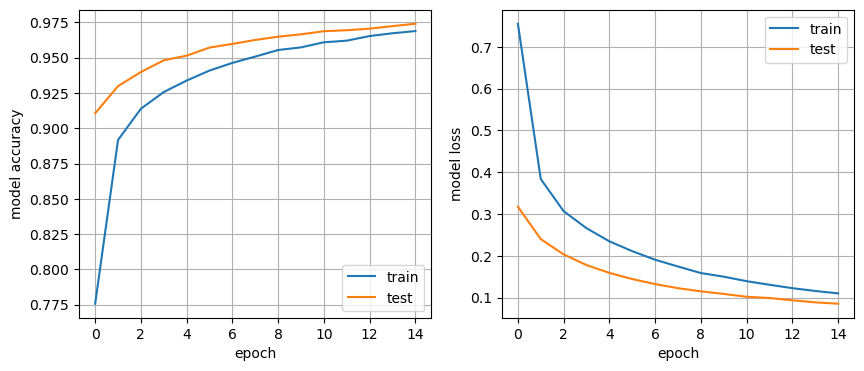

In [2]:
model_DNN = DNN(32, 15)
(score, history) = (None, None)

model_filename = './DNN.keras'
hist_filename = './hist.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_DNN.train_DNN()
    model_DNN.save_model()

else:

    model_DNN.load_model()
    (score, history) = model_DNN.evaluate_DNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.show()

sgd_score = score                   # I will need this later

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


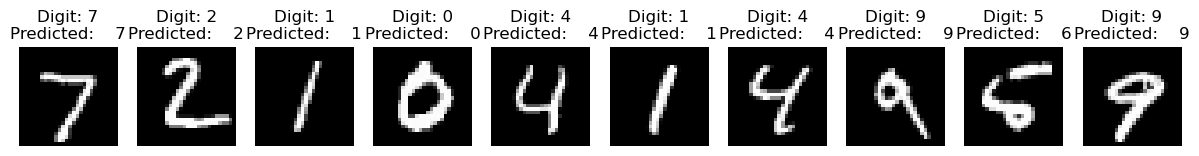

In [3]:
predictions = model_DNN.DNN_predict()
X_test = model_DNN.X_test.reshape(model_DNN.X_test.shape[0], model_DNN.img_rows, model_DNN.img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(model_DNN.Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Test and train accuracy start to converge at 15 epochs => still not enough to completely train the network (ex prediction is off for 5)
I can, anyway, use less epochs to test for the best optimizer, since it is not important for the DNN to be fully trained.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 0.17347578704357147
Test accuracy: 0.9764999747276306
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Completed: 1/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 0.10543423146009445
Test accuracy: 0.9767000079154968
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Completed: 2/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 1.128944754600525
Test accuracy: 0.8025000095367432
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Completed: 3/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...

Test loss: 0.0917450413107872
Test accuracy: 0.9797000288963318
313/313 ━━━

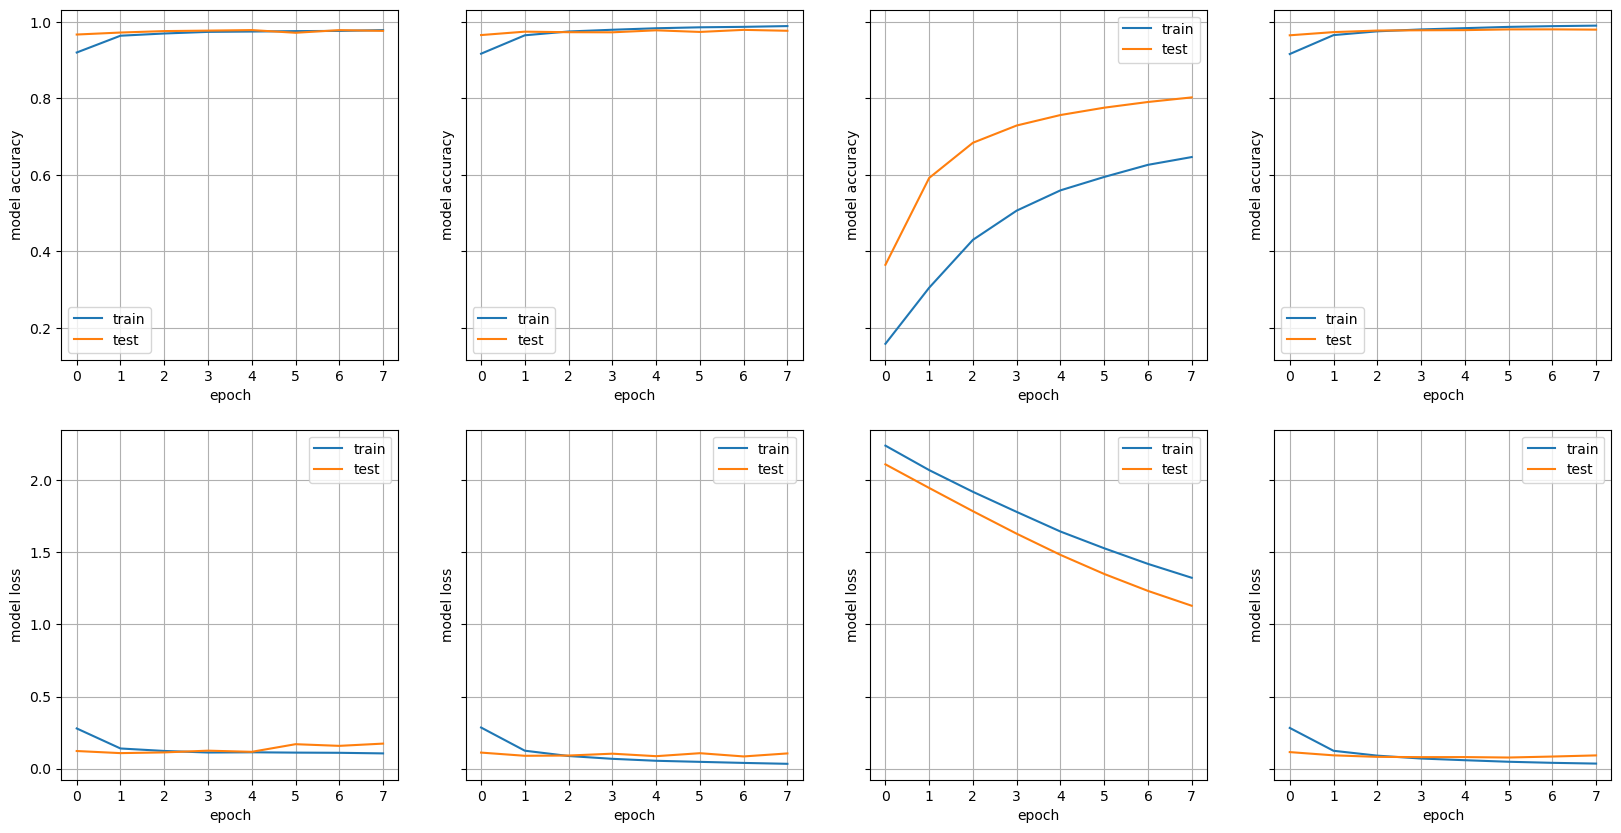

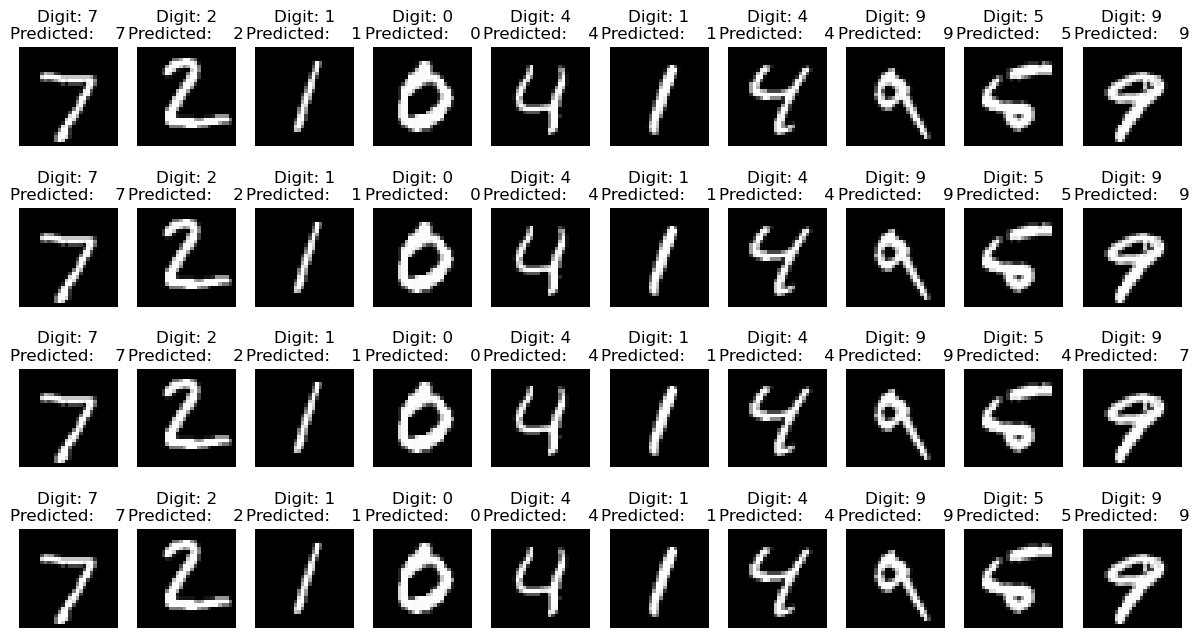

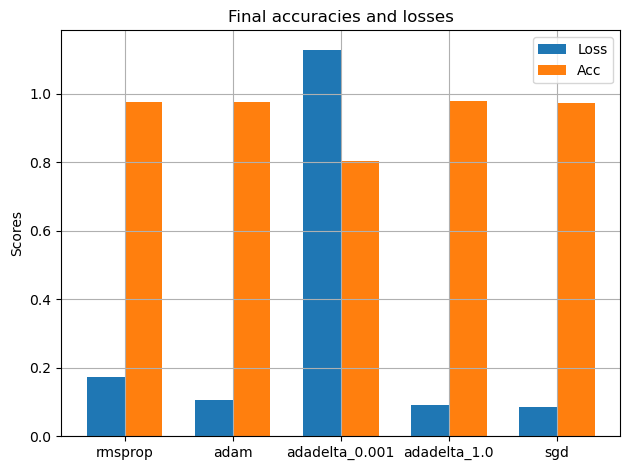

In [4]:
Optimizers = [RMSprop(), Adam(), Adadelta(), Adadelta(learning_rate = 1.0)] 
Optimizers_Str = ['rmsprop', 'adam', 'adadelta_0.001', 'adadelta_1.0'] 

figure_train, ax_train = plt.subplots(2, len(Optimizers), sharey = 'row')
figure_pred, ax_pred = plt.subplots(len(Optimizers), 10)

figure_train.set_size_inches(20, 10)
figure_pred.set_size_inches(15, 8)

path = './OptimizerCmp/'

Accuracies = []
Losses = []

for idx, Optimizer in enumerate(Optimizers):

    model_filename = path + 'DNN_' + Optimizers_Str[idx] + ".keras"
    hist_filename = path + 'hist_' + Optimizers_Str[idx] + ".npy"

    model_DNN = DNN(32, 8, Optimizer, False)
    (score, history) = (None, None)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

        (score, history) = model_DNN.train_DNN()
        model_DNN.save_model(model_filename, hist_filename)

    else:

        model_DNN.load_model(model_filename, hist_filename)
        (score, history) = model_DNN.evaluate_DNN()

    ax_acc = ax_train[0][idx]
    ax_loss = ax_train[1][idx]

    # summarize history for accuracy
    ax_acc.plot(history.history['acc'])
    ax_acc.plot(history.history['val_acc'])
    ax_acc.set_ylabel('model accuracy')
    ax_acc.set_xlabel('epoch')
    ax_acc.legend(['train', 'test'], loc='best')
    ax_acc.grid(True)

    # summarize history for loss
    ax_loss.plot(history.history['loss'])
    ax_loss.plot(history.history['val_loss'])
    ax_loss.set_ylabel('model loss')
    ax_loss.set_xlabel('epoch')
    ax_loss.legend(['train', 'test'], loc='best')
    ax_loss.grid(True)

    predictions = model_DNN.DNN_predict()
    X_test = model_DNN.X_test.reshape(model_DNN.X_test.shape[0], model_DNN.img_rows, model_DNN.img_cols, 1)

    for i in range(10):    
        ax = ax_pred[idx][i]    
        ax.imshow(X_test[i, :, :, 0], cmap='gray')    
        ax.set_title("Digit: {}\nPredicted:    {}".format(np.argmax(model_DNN.Y_test[i]), np.argmax(predictions[i])))    
        ax.axis('off') 

    print("Completed: {}/{}".format(idx + 1, len(Optimizers)))

    Losses.append(score[0])
    Accuracies.append(score[1])

plt.show()

#add sgd data
Losses.append(sgd_score[0])
Accuracies.append(sgd_score[1])
Optimizers_Str.append('sgd')

x = np.arange(len(Optimizers_Str))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Losses, width, label='Loss')
rects2 = ax.bar(x + width/2, Accuracies, width, label='Acc')

# Add some text for Optimizers_Str, title and custom x-axis tick Optimizers_Str, etc.
ax.set_ylabel('Scores')
ax.set_title('Final accuracies and losses')
ax.set_xticks(x)
ax.set_xticklabels(Optimizers_Str)
ax.legend()
ax.grid(True)
fig.tight_layout()

plt.show()


As seen in the bar chart adadelta with lr = 1.0 gives the best results for accuracy and one of the best results for loss (only sgd is marginally better, but with almost double the epochs) => I will use adadelta with lr = 1.0 from now on

I will now train the model for a larger number of epochs (30) to have the final results

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9778 - loss: 0.1695

Test loss: 0.1326342225074768
Test accuracy: 0.9821000099182129


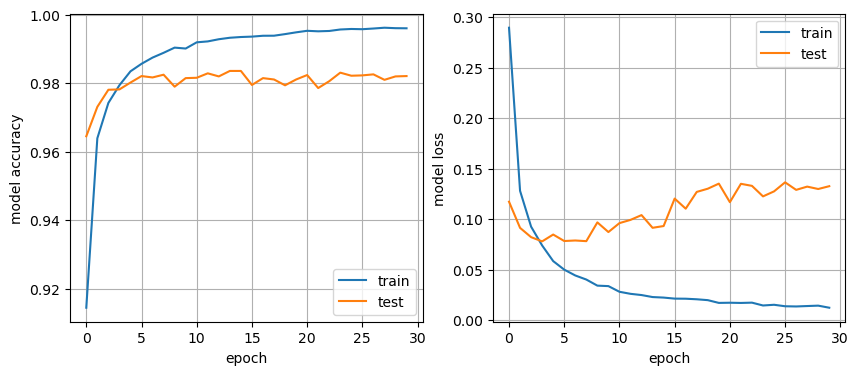

In [5]:
model_DNN = DNN(32, 30, Adadelta(learning_rate = 1.0))
(score, history) = (None, None)

model_filename = './DNN_final.keras'
hist_filename = './hist_final.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_DNN.train_DNN()
    model_DNN.save_model(model_filename, hist_filename)

else:

    model_DNN.load_model(model_filename, hist_filename)
    (score, history) = model_DNN.evaluate_DNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.show()